# Applying Decision tree algorithm on amazon fine food Reviews dataset

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

Id
* ProductId - unique identifier for the product
* UserId - unqiue identifier for the user
* ProfileName
* HelpfulnessNumerator - number of users who found the review helpful
* HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
* Score - rating between 1 and 5
* Time - timestamp for the review
* Summary - brief summary of the review
* Text - text of the review

<b>Disclaimer :</b>
* I have trained all the brute force models with 40K Data points, But since I have only 4GB RAM I have trained kd_tree models with 3K points and tfidf W2V model with 10K points

# Data Preprocessing

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.preprocessing import Imputer
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

con = sqlite3.connect('./amazon-fine-food-reviews/database.sqlite') 

filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3
""", con) 


def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filtered_data.shape
filtered_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [4]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [5]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [6]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

In [7]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)
display


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [8]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]


In [9]:
print(final.shape)
final['Score'].value_counts()

(364171, 10)


positive    307061
negative     57110
Name: Score, dtype: int64

In [10]:
final=final.sort_values(by='Time')

In [11]:
labels=final["Score"]
final=final.drop("Score",axis=1)
final.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."


In [12]:
final=final[0:100000]
labels=labels[0:100000]

In [13]:
for i in range(0,labels.size):
    if labels.iloc[i]=='positive':
        labels.iloc[i]=1
    else:
        labels.iloc[i]=0

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english') 
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [15]:
i=0
str1=' '
final_string=[]
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

In [16]:
final['CleanedText']=final_string 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [17]:
final.loc[138706]['Text']

"this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college"

In [18]:
final.loc[138706]['CleanedText']

'witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'

In [19]:
final.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...


In [20]:
tr_indx=int(70/100*final['CleanedText'].shape[0])
final['CleanedText']
X_tr=final.iloc[:tr_indx]['CleanedText']
y_tr=labels[:tr_indx]
X_test=final.iloc[tr_indx+1:]['CleanedText']
y_test=labels[tr_indx+1:]

In [21]:
print(X_tr.shape)
print(X_test.shape)

(70000,)
(29999,)


# Bag of words

 * ### Decision tree using Gridsearchcv 

In [22]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(X_tr)
final_test = count_vect.transform(X_test)


The optimal number of depth is 10.


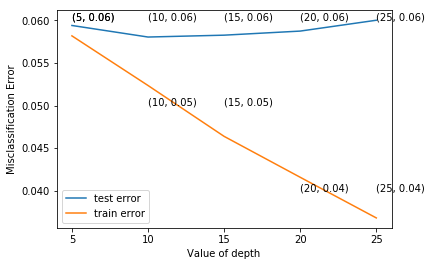

the misclassification error for each depth value is :  [0.059 0.058 0.058 0.059 0.06 ]


In [23]:
depths=[5,10,15,20,25]
tuned_parameters={'max_depth':depths}
dtree = DecisionTreeClassifier()
model = GridSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(final_counts, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_depth = depths[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of depth is %d.' % optimal_depth)
vals = [str(x) for x in depths]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of depth')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each depth value is : ", np.round(MSE_test,3))

In [24]:
optimal_dtree= DecisionTreeClassifier(max_depth = optimal_depth)
optimal_dtree.fit(final_counts, y_tr)
pred = optimal_dtree.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 10 is 87.962932%


#### decision tree visualization

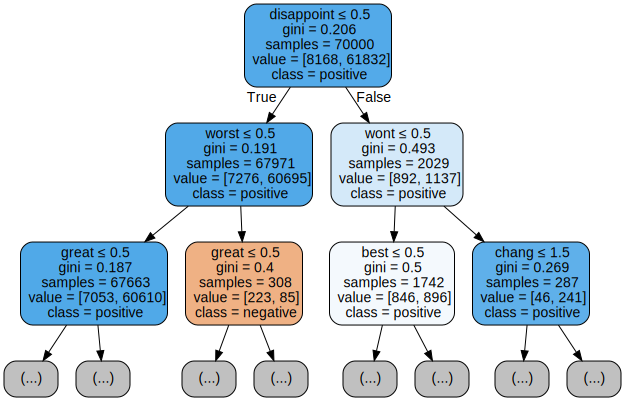

In [25]:
import graphviz
from sklearn.externals.six import StringIO
from sklearn import tree
dot_data = StringIO()
tree.export_graphviz(optimal_dtree, out_file=dot_data)
dot_data = tree.export_graphviz(optimal_dtree, out_file=None, max_depth=2, feature_names=count_vect.get_feature_names(),  class_names=['negative','positive'],  
filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Confusion matrix on test dataset

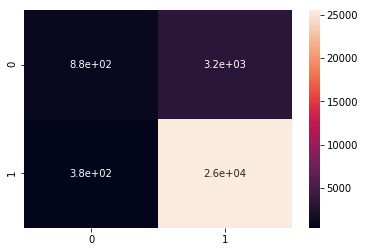

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### feature importance

In [28]:
print("Top features to classify class labels are:\n")
imp_fec = optimal_dtree.feature_importances_.argsort()[::-1]
print(np.take(count_vect.get_feature_names(), imp_fec[:20]),"\n")

Top features to classify class labels are:

['disappoint' 'great' 'worst' 'best' 'money' 'terribl' 'love' 'horribl'
 'return' 'bad' 'wast' 'wont' 'delici' 'refund' 'threw' 'unfortun' 'aw'
 'good' 'ive' 'flavor'] 



#### precision recall and f1-score values

In [29]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of decion tree classifier for bag of words is",scr[0])
print("recall of decion tree classifier for bag of words is",scr[1])
print("fscore of decion tree classifier for bag of words is",scr[2])

precision of decion tree classifier for bag of words is 0.8613884547406581
recall of decion tree classifier for bag of words is 0.8796293209773659
fscore of decion tree classifier for bag of words is 0.8508560642186157


#### Confusion matrix on train dataset

In [30]:
optimal_dtree.fit(final_counts, y_tr)
pred = optimal_dtree.predict(final_counts)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 10 is 90.238571%


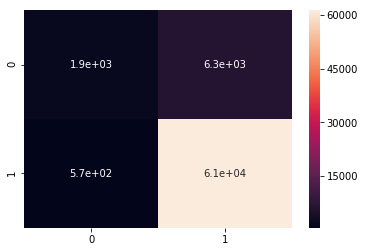

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### BOW using RandonSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV
depths=[5,10,15,20,25,30,35,40,45,50]
tuned_parameters={'max_depth': depths}
dtree = DecisionTreeClassifier()
model = RandomizedSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(final_counts, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for optimal model is %f' % (acc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The accuracy of optimal decision tree classifier for optimal model is 87.982933


# Tfidf

In [33]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_tr)
final_test = tf_idf_vect.transform(X_test)

In [34]:
print(final_test.get_shape())
print(type(final_test))

(29999, 31373)
<class 'scipy.sparse.csr.csr_matrix'>


In [35]:
features = tf_idf_vect.get_feature_names()
len(features)

31373

In [36]:
features[300:310]

['adminst',
 'admir',
 'admiss',
 'admit',
 'admitt',
 'admmit',
 'admonish',
 'adn',
 'ado',
 'adob']

In [37]:
print(final_tf_idf[3,:].toarray()[0])

[0. 0. 0. ... 0. 0. 0.]


In [38]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''

    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[3,:].toarray()[0],features)
print(np.argsort(final_tf_idf[3,:].toarray()[0])[::-1][:25])

final_tf_idf[3,:].get_shape()

[23572 23565   101 16792 11081  4131  6922 14780  3709 17251  8311 27860
  9955 19791 28619 21542 17712 21014 26005 30707 10421 10422 10458 10457
 10456]


(1, 31373)


The optimal number of depth is 10.


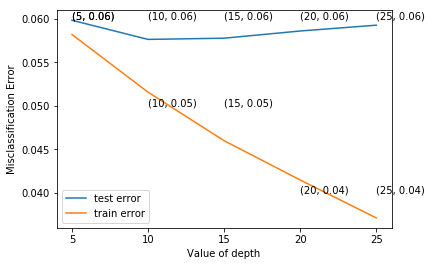

the misclassification error for each depth value is :  [0.06  0.058 0.058 0.059 0.059]


In [39]:
depths=[5,10,15,20,25]
tuned_parameters={'max_depth':depths}
dtree = DecisionTreeClassifier()
model = GridSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(final_tf_idf, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_depth = depths[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of depth is %d.' % optimal_depth)
vals = [str(x) for x in depths]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of depth')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each depth value is : ", np.round(MSE_test,3))

In [40]:
optimal_dtree= DecisionTreeClassifier(max_depth = optimal_depth)
optimal_dtree.fit(final_tf_idf, y_tr)
pred = optimal_dtree.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 10 is 87.872929%


#### decision tree visualization

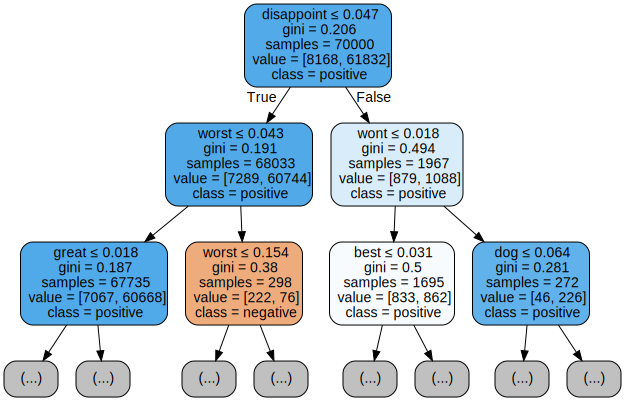

In [41]:
import graphviz
from sklearn.externals.six import StringIO
from sklearn import tree
dot_data = StringIO()
tree.export_graphviz(optimal_dtree, out_file=dot_data)
dot_data = tree.export_graphviz(optimal_dtree, out_file=None,max_depth=2, feature_names=tf_idf_vect.get_feature_names(),  class_names=['negative','positive'],  
filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Confusion matrix on test dataset

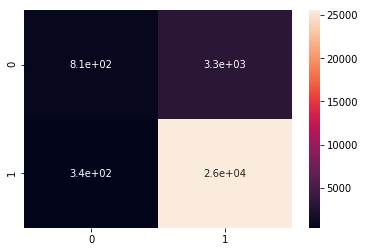

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### feature importance

In [44]:
print("Top features to classify class labels are:\n")
imp_fec = optimal_dtree.feature_importances_.argsort()[::-1]
print(np.take(count_vect.get_feature_names(), imp_fec[:20]),"\n")

Top features to classify class labels are:

['disappoint' 'worst' 'great' 'wast' 'terribl' 'horribl' 'best' 'return'
 'love' 'bad' 'money' 'tast' 'delici' 'wont' 'threw' 'flavor' 'mayb'
 'product' 'thought' 'ive'] 



#### precision recall and f1-score values

In [45]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the decion tree classifier bag of words is",scr[0])
print("recall of the decion tree classifier bag of words is",scr[1])
print("fscore of the decion tree classifier bag of words is",scr[2])

precision of the decion tree classifier bag of words is 0.8606445018604867
recall of the decion tree classifier bag of words is 0.8787292909763659
fscore of the decion tree classifier bag of words is 0.8479305379952633


#### Confusion matrix on train dataset

In [46]:
optimal_dtree.fit(final_tf_idf, y_tr)
pred = optimal_dtree.predict(final_tf_idf)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 10 is 90.371429%


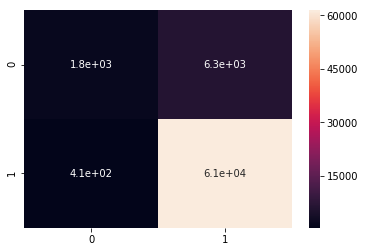

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### Tf-Idf using RandonSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV
depths=[5,10,15,20,25,30,35,40,45,50]
tuned_parameters={'max_depth': depths}
dtree = DecisionTreeClassifier()
model = RandomizedSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(final_tf_idf, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(final_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for optimal model is %f' % (acc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The accuracy of optimal decision tree classifier for optimal model is 87.852928


# Word to Vec

In [49]:
list_of_sent=[]
for sent in X_tr:
    list_of_sent.append(sent.split())

In [50]:
list_of_test=[]
for sent in X_test:
    list_of_test.append(sent.split())

In [51]:
print(X_tr.iloc[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [53]:
print(X_test.iloc[0])
print("*****************************************************************")
print(list_of_test[0])

great price wonder creami resin flavor toast skillet microwav add salad cooki anyth freez well keep frige hand eat one highest nut protein
*****************************************************************
['great', 'price', 'wonder', 'creami', 'resin', 'flavor', 'toast', 'skillet', 'microwav', 'add', 'salad', 'cooki', 'anyth', 'freez', 'well', 'keep', 'frige', 'hand', 'eat', 'one', 'highest', 'nut', 'protein']


In [54]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [55]:
print("number of words that occured minimum 5 times\n ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times
  10700
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'day', 'thirti', 'someth', 'use', 'seri', 'song', 'student', 'teach', 'preschool']


In [56]:
w2v_model.wv.most_similar('book')

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('articl', 0.792966902256012),
 ('author', 0.7925324440002441),
 ('blog', 0.7891132235527039),
 ('magazin', 0.7718403339385986),
 ('video', 0.7457699775695801),
 ('copi', 0.7457298636436462),
 ('page', 0.7412633299827576),
 ('inform', 0.72115159034729),
 ('info', 0.7178357243537903),
 ('group', 0.7070796489715576)]

In [57]:
w2v_model.wv.most_similar('alway')

/home/gateway/home/gateway/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('stuffer', 0.5177405476570129),
 ('home', 0.49836158752441406),
 ('desk', 0.49583789706230164),
 ('hous', 0.4932933449745178),
 ('everyon', 0.49278295040130615),
 ('quick', 0.4926113486289978),
 ('anytim', 0.4909180700778961),
 ('conveni', 0.4720516502857208),
 ('purs', 0.4717640280723572),
 ('fast', 0.47121667861938477)]

# Avg word2Vec

In [58]:
sent_vectors = [];
for sent in list_of_sent: 
    sent_vec = np.zeros(50)
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [59]:
test_vectors = [];
for sent in list_of_test: 
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)

In [60]:
df = pd.DataFrame(sent_vectors)
sent_vectors=df.fillna(0)
df = pd.DataFrame(test_vectors)
test_vectors=df.fillna(0)


The optimal number of depth is 5.


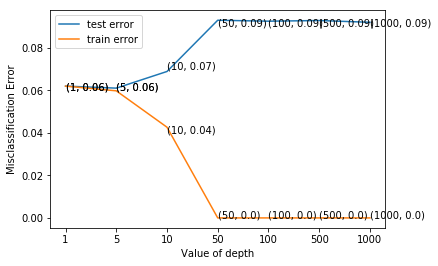

the misclassification error for each depth value is :  [0.062 0.061 0.069 0.093 0.092 0.093 0.092]


In [61]:
depths=[1, 5, 10, 50, 100, 500, 1000]
tuned_parameters={'max_depth':depths}
dtree = DecisionTreeClassifier()
model = GridSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_depth = depths[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of depth is %d.' % optimal_depth)
vals = [str(x) for x in depths]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of depth')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each depth value is : ", np.round(MSE_test,3))

In [62]:
optimal_dtree= DecisionTreeClassifier(max_depth = optimal_depth)
optimal_dtree.fit(sent_vectors, y_tr)
pred = optimal_dtree.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 5 is 86.956232%


#### Confusion matrix on test dataset

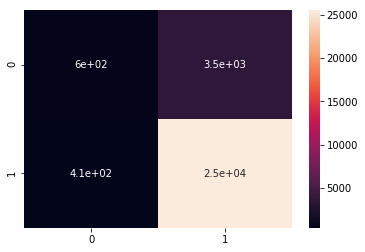

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [64]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the decion tree classifier for bag of words is",scr[0])
print("recall of the decion tree classifier for bag of words is",scr[1])
print("fscore of the decion tree classifier for bag of words is",scr[2])

precision of the decion tree classifier for bag of words is 0.8401797700528152
recall of the decion tree classifier for bag of words is 0.8695623187439582
fscore of the decion tree classifier for bag of words is 0.8336298705139569


#### Confusion matrix on train dataset

In [66]:
optimal_dtree.fit(sent_vectors, y_tr)
pred = optimal_dtree.predict(sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 5 is 88.931429%


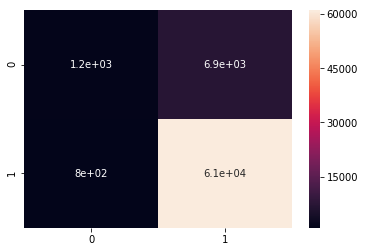

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### Avg-W2V using RandonSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV
depths=[5,10,15,20,25,30,35,40,45,50]
tuned_parameters={'max_depth': depths}
dtree = DecisionTreeClassifier()
model = RandomizedSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(sent_vectors, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for optimal model is %f' % (acc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The accuracy of optimal decision tree classifier for optimal model is 86.956232


# Tfidf W2V

In [69]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_tr)
final_test = tf_idf_vect.transform(X_test)

In [70]:
tfidf_feat = tf_idf_vect.get_feature_names() 
tfidf_sent_vectors = [];
row=0;
i=1
for sent in list_of_sent:
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [71]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_test_vectors = []; 
row=0;
for sent in list_of_test:
    sent_vec = np.zeros(50)
    weight_sum =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_test[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_test_vectors.append(sent_vec)
    row += 1

In [72]:
df = pd.DataFrame(tfidf_sent_vectors)
tfidf_sent_vectors=df.fillna(0)
df = pd.DataFrame(tfidf_test_vectors)
tfidf_test_vectors=df.fillna(0)


The optimal number of depth is 5.


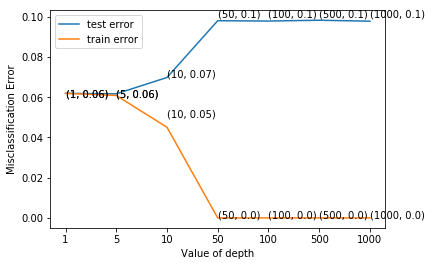

the misclassification error for each depth value is :  [0.062 0.062 0.07  0.098 0.098 0.098 0.098]


In [73]:
depths=[1, 5, 10, 50, 100, 500, 1000]
tuned_parameters={'max_depth':depths}
dtree = DecisionTreeClassifier()
model = GridSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
result=pd.DataFrame(model.cv_results_) 
MSE_test=[1-i for i in result['mean_test_score']]
MSE_train=[1-i for i in result['mean_train_score']]
optimal_depth = depths[MSE_test.index(min(MSE_test))]
print('\nThe optimal number of depth is %d.' % optimal_depth)
vals = [str(x) for x in depths]
plt.plot(vals, MSE_test,label="test error")
plt.plot(vals, MSE_train,label="train error")
for xy in zip(vals, np.round(MSE_test,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(vals, np.round(MSE_train,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.legend()
plt.xlabel('Value of depth')
plt.ylabel('Misclassification Error')
plt.show()
print("the misclassification error for each depth value is : ", np.round(MSE_test,3))

In [74]:
optimal_dtree= DecisionTreeClassifier(max_depth = optimal_depth)
optimal_dtree.fit(tfidf_sent_vectors, y_tr)
pred = optimal_dtree.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 5 is 86.589553%


#### Confusion matrix on test dataset

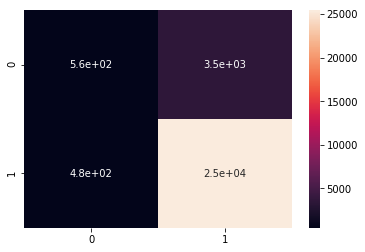

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### precision recall and f1-score values

In [76]:
from sklearn.metrics import precision_recall_fscore_support
scr=precision_recall_fscore_support(y_test, pred, average='weighted')
print("precision of the decion tree classifier for bag of words is",scr[0])
print("recall of the decion tree classifier for bag of words is",scr[1])
print("fscore of the decion tree classifier for bag of words is",scr[2])

precision of the decion tree classifier for bag of words is 0.831225756784971
recall of the decion tree classifier for bag of words is 0.865895529850995
fscore of the decion tree classifier for bag of words is 0.8295874802733478


#### Confusion matrix on train dataset

In [77]:
optimal_dtree.fit(tfidf_sent_vectors, y_tr)
pred = optimal_dtree.predict(tfidf_sent_vectors)
acc = accuracy_score(y_tr, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for depth = %d is %f%%' % (optimal_depth, acc))


The accuracy of optimal decision tree classifier for depth = 5 is 88.588571%


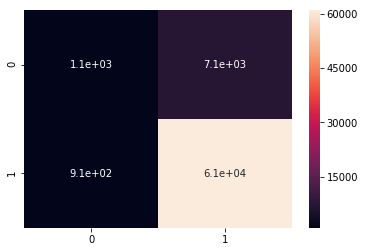

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cf_matrix=confusion_matrix(y_tr, pred)
df_cm = pd.DataFrame(cf_matrix,range(0,2),range(0,2))
sn.heatmap(df_cm, annot=True)

#### TFIDF-w2v using RandonSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV
depths=[5,10,15,20,25,30,35,40,45,50]
tuned_parameters={'max_depth': depths}
dtree = DecisionTreeClassifier()
model = RandomizedSearchCV(dtree, tuned_parameters, scoring = 'f1', cv=5,return_train_score=True)
model.fit(tfidf_sent_vectors, y_tr)
print(model.best_estimator_)
pred = model.best_estimator_.predict(tfidf_test_vectors)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of optimal decision tree classifier for optimal model is %f' % (acc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The accuracy of optimal decision tree classifier for optimal model is 86.589553


# Summary table

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Hyper parameter</th> 
    <th>Train accuracy</th>
    <th>Test accuracy</th>
  </tr>
    <tr>
    <td>BOW with Decision tree using gridsearchcv</td>
    <td>depth=10</td> 
    <td>90.23</td>
    <td>87.96</td>
  </tr>
    <tr>
    <td>BOW with Decision tree using randomsearchcv</td>
    <td>depth=10</td> 
    <td>90.23</td>
    <td>87.96</td>
  </tr>
    <tr>
    <td>Tfidf with Decision tree using gridsearchcv</td>
    <td>depth=10</td> 
    <td>90.37</td>
    <td>87.87</td>
  </tr>
    <tr>
    <td>Tfidf with Decision tree using randomsearchcv</td>
    <td>depth=10</td> 
    <td>90.39</td>
    <td>87.85</td>
  </tr>
  <tr>
    <td>Avg W2V with decision tree using gridsearhcv</td>
    <td>Depth=05</td> 
    <td>88.93</td>
    <td>86.95</td>
  </tr>
  <tr>
    <td>Avg W2V with decision tree using randomsearchcv</td>
    <td>depth=05</td> 
    <td>88.93</td>
    <td>86.95</td>
  </tr>
  <tr>
    <td>Tfidf W2V with Decision tree using gridsearchcv</td>
    <td>depth=05</td> 
    <td>88.58</td>
    <td>86.58</td>
  </tr>
  <tr>
    <td>Tfidf W2V with Decision tree using Ranfomsearchcv</td>
    <td>depth=05</td> 
    <td>88.58</td>
    <td>86.58</td>
  </tr>
</table>
